<a href="https://colab.research.google.com/github/abhigyandatta/outlier_detection_removal/blob/main/outlier_bangalore_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will see how to detect outliers using IQR method.  
Then, we will first remove outliers (TRIMMING).  
Then we will replace outliers with the min nad max threshold values (CAPPING).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('bangalore_housing.csv')

In [3]:
df.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305


In [4]:
# shape of dataset
df.shape

(13200, 7)

In [5]:
# dealing with the size column
df['size'].value_counts()

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [6]:
# convert 1 RK to 0.5bhk
df['size']=df['size'].apply(lambda x: '0.5 BHK' if x=='1 RK' else x)

In [7]:
df['size'].value_counts()

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
0.5 BHK         13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [8]:
# change size from bhk to an integer
df['size']=df['size'].apply(lambda x:x.split()[0])

In [9]:
df['size']=df['size'].astype('float64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  float64
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 722.0+ KB


In [11]:
df['bath']=df['bath'].astype('int32')
df['total_sqft']=df['total_sqft'].astype('int32')

# Visualizing the distributions

In [12]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

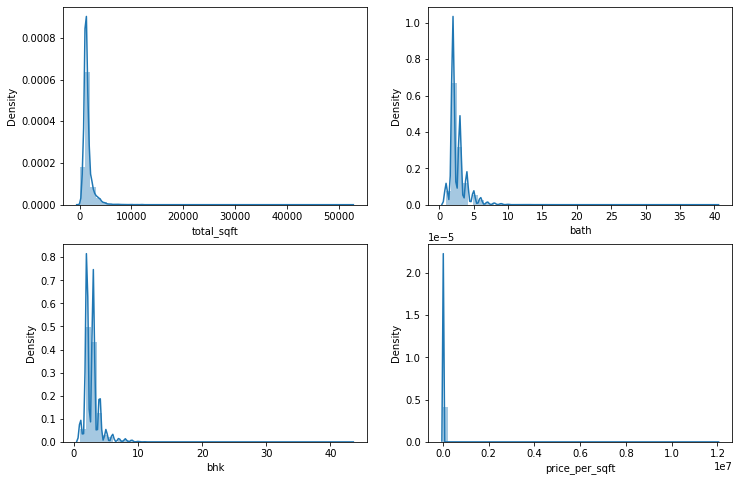

In [16]:
# Distributions

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(df['total_sqft'])

plt.subplot(2,2,2)
sns.distplot(df['bath'])

plt.subplot(2,2,3)
sns.distplot(df['bhk'])

plt.subplot(2,2,4)
sns.distplot(df['price_per_sqft'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

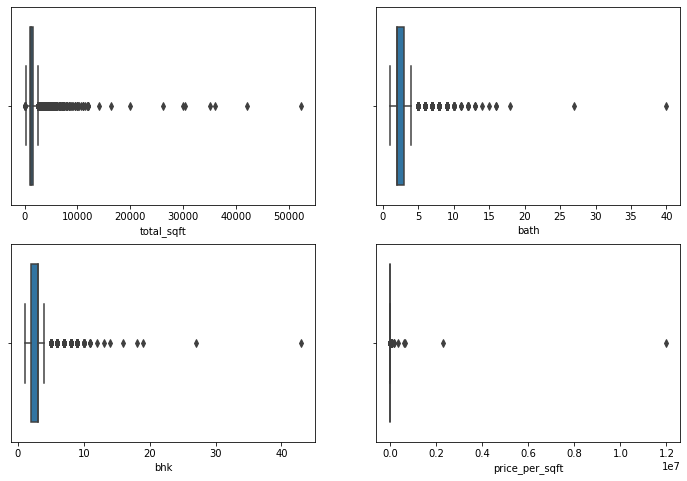

In [17]:
# BoxPlots

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(df['total_sqft'])

plt.subplot(2,2,2)
sns.boxplot(df['bath'])

plt.subplot(2,2,3)
sns.boxplot(df['bhk'])

plt.subplot(2,2,4)
sns.boxplot(df['price_per_sqft'])

Conclusion: All these features are fairly right skewed

In [19]:
print("Skew of price_per_sq_ft",df['price_per_sqft'].skew())
print("Skew of bhk",df['bhk'].skew())
print("Skew of bath",df['bath'].skew())
print("Skew of total_sq_ft",df['total_sqft'].skew())

Skew of price_per_sq_ft 108.28105529705168
Skew of bhk 4.867343477362484
Skew of bath 4.2496359810619335
Skew of total_sq_ft 15.38884325411824


## Finding the IQR

In [20]:
for col in ['price_per_sqft','bhk','bath','total_sqft']:
  25th_percentile=df[col].quantile(0.25)
  75th_percentile=df[col].quantile(0.75)

7920.336742424242
2.8008333333333333
2.6911363636363634
1555.2974242424243


In [21]:
def iqr(input_series):
 Q1=input_series.quantile(0.25)
 Q3=input_series.quantile(0.75)
 IQR=Q3-Q1
 return Q1,Q3,IQR

In [22]:
Q1_price_per_sqft,Q3_price_per_sqft,IQR_price_per_sqft=iqr(df['price_per_sqft'])

In [23]:
min_thresh=Q1_price_per_sqft - 1.5*IQR_price_per_sqft
max_thresh=Q3_price_per_sqft + 1.5*IQR_price_per_sqft

## Trimming (ie removal of outliers)

In [24]:
df_price_sqft_outliered=df[(df['price_per_sqft']>min_thresh) & (df['price_per_sqft']<max_thresh)]

## Visualization of effect of Outlier removal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

Text(0.5, 1.0, 'after outlier removal')

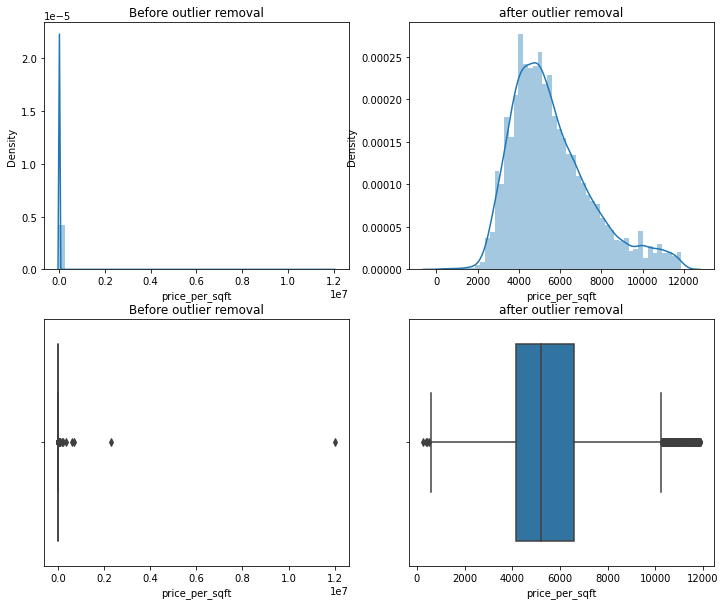

In [32]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.distplot(df['price_per_sqft'])
plt.title('Before outlier removal')

plt.subplot(2,2,2)
sns.distplot(df_price_sqft_outliered['price_per_sqft'])
plt.title('after outlier removal')

plt.subplot(2,2,3)
sns.boxplot(df['price_per_sqft'])
plt.title('Before outlier removal')

plt.subplot(2,2,4)
sns.boxplot(df_price_sqft_outliered['price_per_sqft'])
plt.title('after outlier removal')

## Capping (ie replacing outliers with threshold values)

In [33]:
df_cap=df.copy()

In [36]:
print(min_thresh)
print(max_thresh)

-308.0
11892.0


In [34]:
df_cap['price_per_sqft']=np.where(df_cap['price_per_sqft']>max_thresh,max_thresh,df_cap['price_per_sqft'])
df_cap['price_per_sqft']=np.where(df_cap['price_per_sqft']<min_thresh,min_thresh,df_cap['price_per_sqft'])

## Visualization after capping

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

Text(0.5, 1.0, 'after outlier capping')

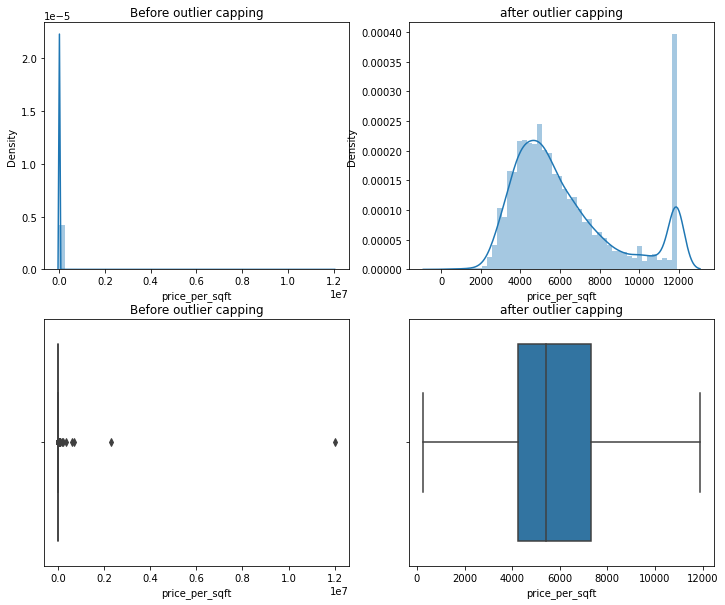

In [35]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.distplot(df['price_per_sqft'])
plt.title('Before outlier capping')

plt.subplot(2,2,2)
sns.distplot(df_cap['price_per_sqft'])
plt.title('after outlier capping')

plt.subplot(2,2,3)
sns.boxplot(df['price_per_sqft'])
plt.title('Before outlier capping')

plt.subplot(2,2,4)
sns.boxplot(df_cap['price_per_sqft'])
plt.title('after outlier capping')